# 1. Setup and descriptive statistics.

## 1.1 Importing libraries and data.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

import keras

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn import metrics
from sklearn.svm import SVC

from keras.models import Sequential
from keras.layers import Dense

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

df = pd.read_csv("shop.csv")

## 1.2 Checking missing values, descriptive statistics.

In [2]:
df.head(5)
df.columns
df.shape
df["Revenue"].describe()

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,Month,OperatingSystems,Browser,Region,TrafficType,VisitorType,Weekend,Revenue
0,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,1,1,1,1,Returning_Visitor,False,False
1,0,0.0,0,0.0,2,64.000000,0.00,0.10,0.0,0.0,Feb,2,2,1,2,Returning_Visitor,False,False
2,0,0.0,0,0.0,1,0.000000,0.20,0.20,0.0,0.0,Feb,4,1,9,3,Returning_Visitor,False,False
3,0,0.0,0,0.0,2,2.666667,0.05,0.14,0.0,0.0,Feb,3,2,2,4,Returning_Visitor,False,False
4,0,0.0,0,0.0,10,627.500000,0.02,0.05,0.0,0.0,Feb,3,3,1,4,Returning_Visitor,True,False


Index(['Administrative', 'Administrative_Duration', 'Informational',
       'Informational_Duration', 'ProductRelated', 'ProductRelated_Duration',
       'BounceRates', 'ExitRates', 'PageValues', 'SpecialDay', 'Month',
       'OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Revenue'],
      dtype='object')

(12330, 18)

count     12330
unique        2
top       False
freq      10422
Name: Revenue, dtype: object

In [3]:
df.isnull().sum().sum()

0

In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 12330 entries, 0 to 12329
Data columns (total 18 columns):
Administrative             12330 non-null int64
Administrative_Duration    12330 non-null float64
Informational              12330 non-null int64
Informational_Duration     12330 non-null float64
ProductRelated             12330 non-null int64
ProductRelated_Duration    12330 non-null float64
BounceRates                12330 non-null float64
ExitRates                  12330 non-null float64
PageValues                 12330 non-null float64
SpecialDay                 12330 non-null float64
Month                      12330 non-null object
OperatingSystems           12330 non-null int64
Browser                    12330 non-null int64
Region                     12330 non-null int64
TrafficType                12330 non-null int64
VisitorType                12330 non-null object
Weekend                    12330 non-null bool
Revenue                    12330 non-null bool
dtypes: bool(

 Data has no missing values, 12330 rows, 17 features and target categorical variable Revenue, 84.5 /% of customers did't end up shoppping.

In [5]:
for cols in df.columns:
    df[cols].describe()

count    12330.000000
mean         2.315166
std          3.321784
min          0.000000
25%          0.000000
50%          1.000000
75%          4.000000
max         27.000000
Name: Administrative, dtype: float64

count    12330.000000
mean        80.818611
std        176.779107
min          0.000000
25%          0.000000
50%          7.500000
75%         93.256250
max       3398.750000
Name: Administrative_Duration, dtype: float64

count    12330.000000
mean         0.503569
std          1.270156
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max         24.000000
Name: Informational, dtype: float64

count    12330.000000
mean        34.472398
std        140.749294
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       2549.375000
Name: Informational_Duration, dtype: float64

count    12330.000000
mean        31.731468
std         44.475503
min          0.000000
25%          7.000000
50%         18.000000
75%         38.000000
max        705.000000
Name: ProductRelated, dtype: float64

count    12330.000000
mean      1194.746220
std       1913.669288
min          0.000000
25%        184.137500
50%        598.936905
75%       1464.157213
max      63973.522230
Name: ProductRelated_Duration, dtype: float64

count    12330.000000
mean         0.022191
std          0.048488
min          0.000000
25%          0.000000
50%          0.003112
75%          0.016813
max          0.200000
Name: BounceRates, dtype: float64

count    12330.000000
mean         0.043073
std          0.048597
min          0.000000
25%          0.014286
50%          0.025156
75%          0.050000
max          0.200000
Name: ExitRates, dtype: float64

count    12330.000000
mean         5.889258
std         18.568437
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max        361.763742
Name: PageValues, dtype: float64

count    12330.000000
mean         0.061427
std          0.198917
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max          1.000000
Name: SpecialDay, dtype: float64

count     12330
unique       10
top         May
freq       3364
Name: Month, dtype: object

count    12330.000000
mean         2.124006
std          0.911325
min          1.000000
25%          2.000000
50%          2.000000
75%          3.000000
max          8.000000
Name: OperatingSystems, dtype: float64

count    12330.000000
mean         2.357097
std          1.717277
min          1.000000
25%          2.000000
50%          2.000000
75%          2.000000
max         13.000000
Name: Browser, dtype: float64

count    12330.000000
mean         3.147364
std          2.401591
min          1.000000
25%          1.000000
50%          3.000000
75%          4.000000
max          9.000000
Name: Region, dtype: float64

count    12330.000000
mean         4.069586
std          4.025169
min          1.000000
25%          2.000000
50%          2.000000
75%          4.000000
max         20.000000
Name: TrafficType, dtype: float64

count                 12330
unique                    3
top       Returning_Visitor
freq                  10551
Name: VisitorType, dtype: object

count     12330
unique        2
top       False
freq       9462
Name: Weekend, dtype: object

count     12330
unique        2
top       False
freq      10422
Name: Revenue, dtype: object

## 1.3 Correlation matrix.

In [6]:
corr = df.corr()
corr.style.background_gradient(cmap='coolwarm').set_precision(2)

,Administrative,Administrative_Duration,Informational,Informational_Duration,ProductRelated,ProductRelated_Duration,BounceRates,ExitRates,PageValues,SpecialDay,OperatingSystems,Browser,Region,TrafficType,Weekend,Revenue
Administrative,1,0.6,0.38,0.26,0.43,0.37,-0.22,-0.32,0.099,-0.095,-0.0063,-0.025,-0.0055,-0.034,0.026,0.14
Administrative_Duration,0.6,1,0.3,0.24,0.29,0.36,-0.14,-0.21,0.068,-0.073,-0.0073,-0.015,-0.0056,-0.014,0.015,0.094
Informational,0.38,0.3,1,0.62,0.37,0.39,-0.12,-0.16,0.049,-0.048,-0.0095,-0.038,-0.029,-0.034,0.036,0.095
Informational_Duration,0.26,0.24,0.62,1,0.28,0.35,-0.074,-0.11,0.031,-0.031,-0.0096,-0.019,-0.027,-0.025,0.024,0.07
ProductRelated,0.43,0.29,0.37,0.28,1,0.86,-0.2,-0.29,0.056,-0.024,0.0043,-0.013,-0.038,-0.043,0.016,0.16
ProductRelated_Duration,0.37,0.36,0.39,0.35,0.86,1,-0.18,-0.25,0.053,-0.036,0.003,-0.0074,-0.033,-0.036,0.0073,0.15
BounceRates,-0.22,-0.14,-0.12,-0.074,-0.2,-0.18,1,0.91,-0.12,0.073,0.024,-0.016,-0.0065,0.078,-0.047,-0.15
ExitRates,-0.32,-0.21,-0.16,-0.11,-0.29,-0.25,0.91,1,-0.17,0.1,0.015,-0.0044,-0.0089,0.079,-0.063,-0.21
PageValues,0.099,0.068,0.049,0.031,0.056,0.053,-0.12,-0.17,1,-0.064,0.019,0.046,0.011,0.013,0.012,0.49
SpecialDay,-0.095,-0.073,-0.048,-0.031,-0.024,-0.036,0.073,0.1,-0.064,1,0.013,0.0035,-0.016,0.052,-0.017,-0.082


 Significant correlation is observed with PageValues and ExitRates (negative). ExitRates is highly correlated with BounceRates.

## 1.4 Exploring variables.

(numerical)

Bounce rate
Average bounce rate (percentage of visitors who enter the site and then leave rather than continuing to view other pages within the same site).

Exit rate
Average exit rate value of the pages visited by the visitor

Page value
Average page value of the pages visited by the visitor

Special day
Closeness of the site visiting time to a special day

(categorical)

TrafficType [20]
Traffic source by which the visitor has arrived at the Web site (e.g., banner, SMS, direct)

VisitorType [3]
Visitor type as “New Visitor,” “Returning Visitor,” and “Other”

Revenue
Class label indicating whether the visit has been finalized with a transaction

In [7]:
categorical = df[["OperatingSystems", "Browser", "Region", "TrafficType", "VisitorType", "Weekend", "Month", "Revenue"]]
categorical.columns

for columns in categorical:
    df[columns].unique()
    columns

Index(['OperatingSystems', 'Browser', 'Region', 'TrafficType', 'VisitorType',
       'Weekend', 'Month', 'Revenue'],
      dtype='object')

array([1, 2, 4, 3, 7, 6, 8, 5], dtype=int64)

'OperatingSystems'

array([ 1,  2,  3,  4,  5,  6,  7, 10,  8,  9, 12, 13, 11], dtype=int64)

'Browser'

array([1, 9, 2, 3, 4, 5, 6, 7, 8], dtype=int64)

'Region'

array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 18, 19,
       16, 17, 20], dtype=int64)

'TrafficType'

array(['Returning_Visitor', 'New_Visitor', 'Other'], dtype=object)

'VisitorType'

array([False,  True])

'Weekend'

array(['Feb', 'Mar', 'May', 'Oct', 'June', 'Jul', 'Aug', 'Nov', 'Sep',
       'Dec'], dtype=object)

'Month'

array([False,  True])

'Revenue'

## 1.5 Plotting.

### 1.5.1 Removing outliers.

In [8]:
df = df.drop(df[df["Informational"]>15].index)
df = df.drop(df[df["Administrative_Duration"]>2000].index)
df = df.drop(df[df["ProductRelated"]>500].index)
df = df.drop(df[df["ProductRelated_Duration"]>2000].index)
df = df.drop(df[df["Informational_Duration"]>1500].index)
df = df.drop(df[df["Informational"]>10].index)

### 1.5.2 Plots.

In [9]:
lab_enc = preprocessing.LabelEncoder()
lab_enc.fit(df['Revenue'])
variable = lab_enc.transform(df['Revenue'])

LabelEncoder()

count    1353.000000
mean       31.543034
std        38.151018
min         0.000000
25%         6.284045
50%        20.971440
75%        44.679250
max       361.763742
Name: Revenue = 1, dtype: float64

count    8837.000000
mean        1.552381
std         7.904401
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       218.395192
Name: Revenue = 0, dtype: float64

[Text(0.5, 0, 'Page Values')]

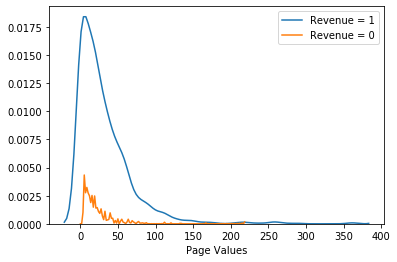

In [10]:
page_1 = df[variable==1]["PageValues"]
page_1 = page_1.rename("Revenue = 1")

page_0 = df[variable==0]["PageValues"]
page_0 = page_0.rename("Revenue = 0")

page_1.describe()
page_0.describe()

sns.kdeplot(page_1)
a = sns.kdeplot(page_0)

a.set(xlabel="Page Values")

#as expected for revenue=1 page values are bigger 

D:\Utils\Conda\lib\site-packages\seaborn\axisgrid.py:2065: UserWarning: The `size` parameter has been renamed to `height`; pleaes update your code.
  warnings.warn(msg, UserWarning)


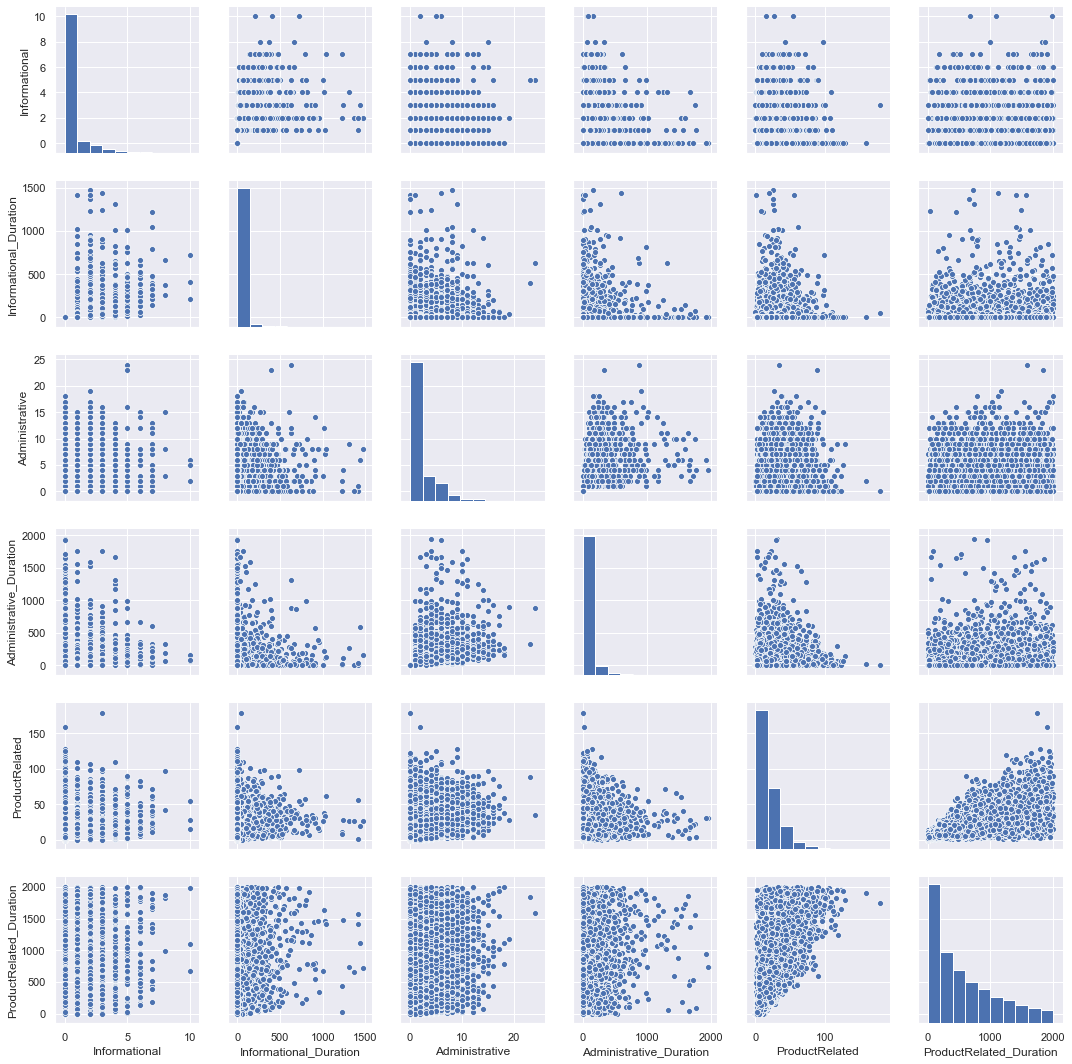

In [11]:
sns.set()
columns = ["Informational", "Informational_Duration", "Administrative", "Administrative_Duration", "ProductRelated", "ProductRelated_Duration"]
sns.pairplot(df[columns], size = 2.5)

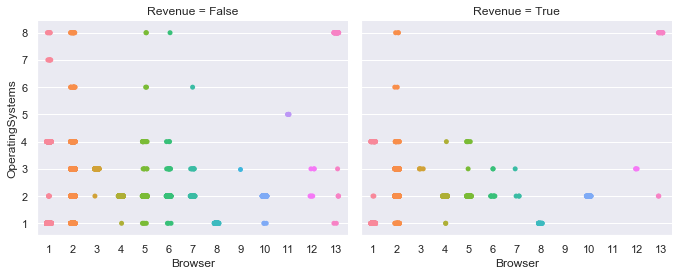

In [12]:
sns.catplot(x="Browser", y="OperatingSystems", col="Revenue", data=df,
height=4, aspect=1.2)

#browser and operating system don't seem to be relevant as plots are fairly similar

In [13]:
df["Browser"].value_counts()
df["OperatingSystems"].value_counts()

2     6401
1     2166
4      618
5      386
6      144
10     136
8      128
3       96
13      57
7       42
12      10
11       5
9        1
Name: Browser, dtype: int64

2    5219
1    2289
3    2198
4     381
8      75
6      17
7       6
5       5
Name: OperatingSystems, dtype: int64

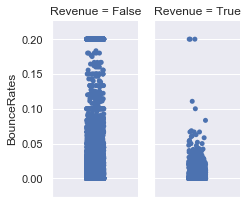

In [14]:
sns.catplot(y="BounceRates", col="Revenue", data=df,
height=3, aspect=0.6) #clearly the highest average bounce rate - more probable to get 0 as correlation plot showed

# 2. Feature engineering.

In [15]:
df["Adm"] = df["Administrative"]*df["Administrative_Duration"]
df["Inf"] = df["Informational"]*df["Informational_Duration"]
df["PrRel"] = df["ProductRelated"]*df["ProductRelated_Duration"]

df["AdmAvg"] = df["Administrative_Duration"]/df["Administrative"]
df["InfAvg"] = df["Informational_Duration"]/df["Informational"]
df["PrRelAvg"] = df["ProductRelated_Duration"]/df["ProductRelated"]
#average time spent on selected websites
df["AdmAvg"] = df["AdmAvg"].fillna(df["AdmAvg"].mean())
df["PrRelAvg"] = df["PrRelAvg"].fillna(df["PrRelAvg"].mean())
df["InfAvg"] = df["InfAvg"].fillna(df["InfAvg"].mean())

df["AdmAvg"].describe()
df["PrRelAvg"].describe()
df["InfAvg"].describe()

df["AdmAvg"]
#as expected people spend most time in Information pages

df["SpecialWeekend"] = df["Weekend"]*df["SpecialDay"]

count    10190.000000
mean        36.880299
std         35.495363
min          0.000000
25%         23.962500
50%         36.880299
75%         36.880299
max        993.000000
Name: AdmAvg, dtype: float64

count    10190.000000
mean        33.737594
std         44.007295
min          0.000000
25%         15.800454
50%         25.588920
75%         39.927083
max       1411.000000
Name: PrRelAvg, dtype: float64

count    10190.000000
mean        58.583024
std         39.223239
min          0.000000
25%         58.583024
50%         58.583024
75%         58.583024
max       1411.000000
Name: InfAvg, dtype: float64

0        36.880299
1        36.880299
2        36.880299
3        36.880299
4        36.880299
           ...    
12325    48.333333
12326    36.880299
12327    36.880299
12328    18.750000
12329    36.880299
Name: AdmAvg, Length: 10190, dtype: float64

# 3. Modelling.

## 3.1 Getting ready for models.

In [16]:
df = pd.get_dummies(df)

In [17]:
y = df["Revenue"]

X_train, X_test, y_train, y_test = train_test_split(df, y, test_size=0.2)

X_train = X_train.drop("Revenue", axis=1)
X_test = X_test.drop("Revenue", axis=1)

X_test.shape
X_train.shape
y_test.shape
y_train.shape

(2038, 35)

(8152, 35)

(2038,)

(8152,)

## 3.2 Models.

In [18]:
svm = SVC(gamma='auto')
svm.fit(X_train, y_train)

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [19]:
rf = RandomForestRegressor(n_estimators = 500, random_state = 42)
rf.fit(X_train, y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=500,
                      n_jobs=None, oob_score=False, random_state=42, verbose=0,
                      warm_start=False)

In [20]:
mlp = MLPClassifier(solver='lbfgs', alpha=1e-5, 
                    hidden_layer_sizes=(15,), random_state=1)
mlp.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=1e-05, batch_size='auto', beta_1=0.9,
              beta_2=0.999, early_stopping=False, epsilon=1e-08,
              hidden_layer_sizes=(15,), learning_rate='constant',
              learning_rate_init=0.001, max_iter=200, momentum=0.9,
              n_iter_no_change=10, nesterovs_momentum=True, power_t=0.5,
              random_state=1, shuffle=True, solver='lbfgs', tol=0.0001,
              validation_fraction=0.1, verbose=False, warm_start=False)

In [21]:
ada = AdaBoostClassifier(n_estimators=50,
                         learning_rate=1)
ada.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None, learning_rate=1,
                   n_estimators=50, random_state=None)

In [22]:
y_pred_svm = svm.predict(X_test)
y_pred_rf = rf.predict(X_test)
y_pred_mlp = mlp.predict(X_test)
y_pred_ada = ada.predict(X_test)

In [ ]:
from keras.models import Sequential
from keras.layers import Dense 

model = Sequential()

model.add(Dense(16, input_dim=35, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

model.compile(loss='binary_crossentropy', optimizer='adam', metrics=['accuracy'])
model.fit(X_train, y_train, epochs = 20, batch_size=5)
model.metrics_names

Epoch 1/20
8152/8152 [==============================] - 4s 508us/step - loss: 2.1567 - acc: 0.8641
Epoch 2/20
8152/8152 [==============================] - 4s 469us/step - loss: 2.1143 - acc: 0.8642
Epoch 3/20
8152/8152 [==============================] - 4s 445us/step - loss: 2.0464 - acc: 0.8646
Epoch 4/20
8152/8152 [==============================] - 3s 380us/step - loss: 2.0502 - acc: 0.8570 2s - loss: 2.
Epoch 5/20
8152/8152 [==============================] - 3s 408us/step - loss: 2.0370 - acc: 0.8622
Epoch 6/20
8152/8152 [==============================] - 3s 398us/step - loss: 1.8844 - acc: 0.8630
Epoch 7/20
8152/8152 [==============================] - 3s 380us/step - loss: 1.4062 - acc: 0.8638
Epoch 8/20
8152/8152 [==============================] - 3s 372us/step - loss: 0.3840 - acc: 0.8676 0s - loss: 0.3823 - acc: 0
Epoch 9/20
8152/8152 [==============================] - 3s 423us/step - loss: 0.3524 - acc: 0.8702
Epoch 10/20
8152/8152 [==============================] - 5s 564us/st

### 3.2.1 Validating scores.

In [26]:
score_svm = cross_val_score(svm, X_train, y_train, cv=10)

In [27]:
score_rf = cross_val_score(rf, X_train, y_train, cv=10)

In [28]:
score_mlp = cross_val_score(mlp, X_train, y_train, cv=10)

In [29]:
score_ada = cross_val_score(ada, X_train, y_train, cv=10)

In [30]:
def display_scores(scores):
    print('Scores: ', scores)
    print('Mean: ', scores.mean())
    print('Standard deviation: ', scores.std())
    print()

In [31]:
display_scores(score_svm)
display_scores(score_rf)
display_scores(score_mlp)
display_scores(score_ada)

Scores:  [0.86519608 0.86519608 0.86625767 0.86625767 0.86625767 0.86625767
 0.86625767 0.86625767 0.86625767 0.86625767]
Mean:  0.8660453506555997
Standard deviation:  0.00042463611211354115

Scores:  [0.52449828 0.46667566 0.53663637 0.49253461 0.60580319 0.52120343
 0.46156595 0.49073535 0.58687989 0.51172678]
Mean:  0.5198259492742661
Standard deviation:  0.04480010369560334

Scores:  [0.84191176 0.82107843 0.80981595 0.86871166 0.79754601 0.83190184
 0.83312883 0.70552147 0.82822086 0.84171779]
Mean:  0.8179554613256347
Standard deviation:  0.04168789671270955

Scores:  [0.92401961 0.91421569 0.91656442 0.90920245 0.93006135 0.9190184
 0.90920245 0.89570552 0.92147239 0.91288344]
Mean:  0.9152345723565501
Standard deviation:  0.009015149239068952



In [32]:
accuracy = model.evaluate(X_test, y_test)
print('Accuracy: %.2f' % (accuracy[1]*100))

#accuracy of neural networks

2038/2038 [==============================] - 0s 105us/step
Accuracy: 87.19


COMMENT:  alltogether 3-4 pages including plots should be alright

 It would be nice to write about:
 
 abstract
 short description of a problem, which dataset was used
 
 motivation
 how this can help businesses, about 5 sentences, can rely on the paper 
 
 analysis
 good sized data set, binary classification problem, mention about lack of missing values, removing outliers, which variables turned out to be relevant, which turned out to be irrelevant (including plots and correlation plot), feature engineering with pages duration and number of visits that boosted accuracies

 modelling
 why we have choosen those algorithms, what worked (support vector machines/multi layer perceptron), what did not (random forest)
 we came up with another algorithm which data was good for as we got rid of outliers and there was little noise in the data, turned out to score the highest
 why we have chosen this number of layers/neurons and activation fn, maybe insights from paper or if random don't mention details
 include table showing accuracies from the display_scores fn and accuracy from neural networks
 
 conclusion
 1) we came up with decent accuracy
 2) highlight how that can help businesses